In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('sales_data.csv', header=0)
df

,Month,Sales
0,2019-12-01,34592.2250
1,2020-01-01,71429.7500
2,2020-02-01,70562.8000
3,2020-03-01,69468.6250
4,2020-04-01,28269.4750
5,2020-05-01,105296.9450
6,2020-06-01,108510.1300
7,2020-07-01,118901.9800
8,2020-08-01,122981.7350
9,2020-09-01,138106.3350


In [92]:
df_temp = df['Sales'].sort_values()
df_temp

21     20563.5100
4      28269.4750
0      34592.2250
14     51058.1250
3      69468.6250
2      70562.8000
1      71429.7500
17     85207.8200
5     105296.9450
11    107246.3000
6     108510.1300
16    110695.4535
15    116743.7600
7     118901.9800
8     122981.7350
18    127947.0500
9     138106.3350
10    142279.5300
12    148508.3225
20    174574.6300
19    176570.0300
13    219814.1750
Name: Sales, dtype: float64

# Simple Linear Regression

In [3]:
x = np.arange(df['Month'].size)


In [5]:
fit = np.polyfit(x, df['Sales'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 2949.4984110671962
Intercept : 75817.93513833985


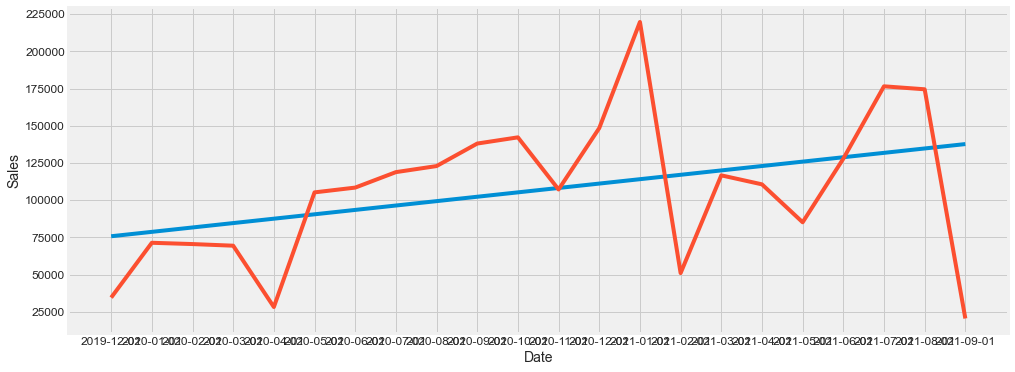

In [90]:
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)

#Linear regression plot
plt.plot(df['Month'], fit_function(x))
#Time series data plot
plt.plot(df['Month'], df['Sales'])

plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [28]:
prediction = fit_function(df['Month'].size + 3)
print(prediction)


149555.39541501977


In [26]:
prediction = fit_function(df['Month'].size + 6)
print(prediction)

158403.89064822134


# try to build ARIMA model

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data = pd.read_csv("sales_data.csv")
data.head()

,Month,Sales
0,2019-12-01,34592.225
1,2020-01-01,71429.750
2,2020-02-01,70562.800
3,2020-03-01,69468.625
4,2020-04-01,28269.475


In [34]:
data.index = pd.to_datetime(data['Month'])
data.drop(columns='Month',inplace=True)
data.head()

,Sales
Month,
2019-12-01,34592.225
2020-01-01,71429.750
2020-02-01,70562.800
2020-03-01,69468.625
2020-04-01,28269.475


In [35]:
data.isna().sum()

Sales    0
dtype: int64

<AxesSubplot:xlabel='Month'>

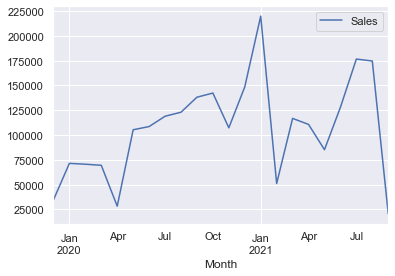

In [36]:
data.plot()

In [38]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Sales, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -109.84424255663221
2. P-Value :  0.0
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 12
5. Critical Values :
	 1% :  -4.137829282407408
	 5% :  -3.1549724074074077
	 10% :  -2.7144769444444443


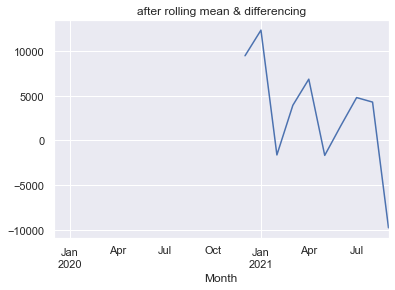

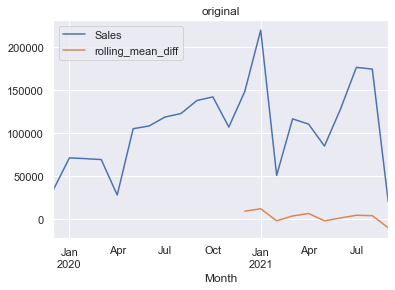

In [39]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [40]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.9030432665833044
2. P-Value :  0.33063081923909626
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 6
5. Critical Values :
	 1% :  -5.354256481481482
	 5% :  -3.6462381481481483
	 10% :  -2.901197777777778


In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
model=ARIMA(data['Sales'],order=(1,1,1))
history=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
